In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,date

RFM (Recency, Frequency, Monetary) analysis using Python. RFM analysis is a technique used to segment customers based on their purchasing history. It stands for:

Recency: Which column represents the date of purchase or interaction? This is needed to calculate how recently each customer has made a purchase.
Frequency: Which column indicates the number of transactions or interactions? This is used to determine how often each customer makes a purchase.
Monetary: Which column shows the monetary value of each transaction? This is used to calculate how much money each customer has spent in total.
To perform an RFM analysis, you'll need a dataset containing customer transaction data. This data should include customer identifiers, transaction dates, and transaction amounts at a minimum. It's a great way to identify high-value customers and tailor marketing strategies accordingly.

In [6]:
df=pd.read_csv("E:\\Python\\ML_PROJECTS\\MCI_Omnichannel_Commerce\\data.csv", encoding='unicode_escape')

In [7]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [12]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# Based on this structure, we can use the following columns for the RFM analysis:

Recency: We can use the InvoiceDate column to calculate how recently each customer has made a purchase.

Frequency: The frequency can be determined by counting the number of transactions (rows) per CustomerID.

Monetary: This can be calculated by multiplying Quantity by UnitPrice for each row, and then summing these values for each customer.

# Data Preprocessing

In [15]:
df=df[(df['Quantity']>0) & (df['UnitPrice']>0)]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [16]:
df=df[~df['CustomerID'].isna()]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [18]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [21]:
df['CustomerID']=df['CustomerID'].astype(int)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

C:\Users\hp\AppData\Local\Temp\ipykernel_26176\3551833727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID']=df['CustomerID'].astype(int)
C:\Users\hp\AppData\Local\Temp\ipykernel_26176\3551833727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int32         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.8+ MB


In [23]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [24]:
df.corr()

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.004563,-0.006232
UnitPrice,-0.004563,1.000000,-0.010873
CustomerID,-0.006232,-0.010873,1.000000


<AxesSubplot:>

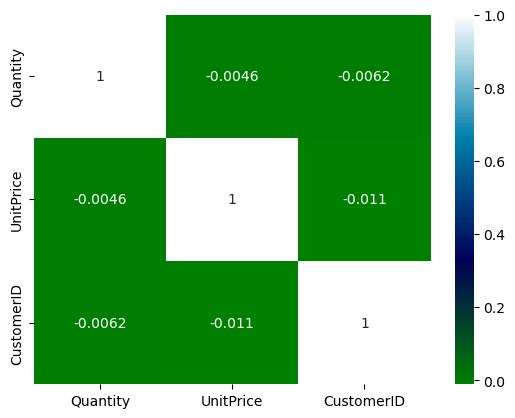

In [34]:
sns.heatmap(df.corr(),cmap='ocean',annot=True)

# RFM Analysis

In [44]:
today = datetime.now()
today

datetime.datetime(2024, 5, 26, 9, 5, 50, 794512)

In [47]:
#recency
recency_df=df.groupby(by='CustomerID',as_index=False)['InvoiceDate'].max()
recency_df.columns = ['CustomerID', 'LastPurchaseDate']
recency_df['recency']=(today-recency_df['LastPurchaseDate']).dt.days

In [48]:
recency_df

,CustomerID,LastPurchaseDate,recency
0,12346,2011-01-18 10:01:00,4876
1,12347,2011-12-07 15:52:00,4553
2,12348,2011-09-25 13:13:00,4626
3,12349,2011-11-21 09:51:00,4569
4,12350,2011-02-02 16:01:00,4861
...,...,...,...
4333,18280,2011-03-07 09:52:00,4828
4334,18281,2011-06-12 10:53:00,4731
4335,18282,2011-12-02 11:43:00,4558
4336,18283,2011-12-06 12:02:00,4554


In [49]:
#frequency
frequency_df = df.groupby(by='CustomerID', as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID', 'Frequency']
frequency_df

,CustomerID,Frequency
0,12346,1
1,12347,182
2,12348,31
3,12349,73
4,12350,17
...,...,...
4333,18280,10
4334,18281,7
4335,18282,12
4336,18283,756


In [52]:
#Monetary
df['TotalCost']=df['Quantity'] * df['UnitPrice']
monetary_df = df.groupby(by='CustomerID', as_index=False)['TotalCost'].sum()
monetary_df.columns = ['CustomerID', 'Monetary']
monetary_df

C:\Users\hp\AppData\Local\Temp\ipykernel_26176\2002103335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCost']=df['Quantity'] * df['UnitPrice']


,CustomerID,Monetary
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40
...,...,...
4333,18280,180.60
4334,18281,80.82
4335,18282,178.05
4336,18283,2094.88


In [54]:
rfm_df=recency_df.merge(frequency_df,on='CustomerID').merge(monetary_df,on='CustomerID')
rfm_df

,CustomerID,LastPurchaseDate,recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,4876,1,77183.60
1,12347,2011-12-07 15:52:00,4553,182,4310.00
2,12348,2011-09-25 13:13:00,4626,31,1797.24
3,12349,2011-11-21 09:51:00,4569,73,1757.55
4,12350,2011-02-02 16:01:00,4861,17,334.40
...,...,...,...,...,...
4333,18280,2011-03-07 09:52:00,4828,10,180.60
4334,18281,2011-06-12 10:53:00,4731,7,80.82
4335,18282,2011-12-02 11:43:00,4558,12,178.05
4336,18283,2011-12-06 12:02:00,4554,756,2094.88


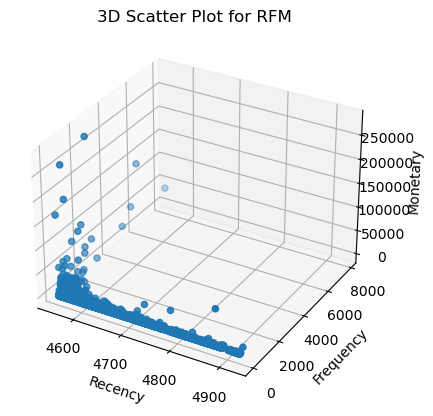

In [57]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.scatter(rfm_df['recency'], rfm_df['Frequency'], rfm_df['Monetary'])
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('3D Scatter Plot for RFM')

plt.show()

In [66]:
##RFM Metrics
rfm_df['Recency_score']=pd.qcut(rfm_df['recency'],4, labels=[4, 3, 2, 1])
rfm_df['FrequencyScore'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm_df['MonetaryScore'] = pd.qcut(rfm_df['Monetary'], 4, labels=[1, 2, 3, 4])
rfm_df['RFMScore'] = rfm_df['Recency_score'].astype(str) + rfm_df['FrequencyScore'].astype(str) + rfm_df['MonetaryScore'].astype(str)
rfm_df[['CustomerID', 'Recency_score', 'FrequencyScore', 'MonetaryScore', 'RFMScore']]

,CustomerID,Recency_score,FrequencyScore,MonetaryScore,RFMScore
0,12346,1,1,4,114
1,12347,4,4,4,444
2,12348,2,2,4,224
3,12349,3,3,4,334
4,12350,1,1,2,112
...,...,...,...,...,...
4333,18280,1,1,1,111
4334,18281,1,1,1,111
4335,18282,4,1,1,411
4336,18283,4,4,4,444
